# Pre-trained embeddings for Text

In [1]:
import gzip
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
glove_path = '../data/embeddings/glove.6B.50d.txt.gz'

In [3]:
with gzip.open(glove_path, 'r') as fin:
    line = fin.readline().decode('utf-8')

In [4]:
line

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'

In [5]:
def parse_line(line):
    values = line.decode('utf-8').strip().split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    return word, vector

In [6]:
embeddings = {}
word_index = {}

In [7]:
word_inverted_index = []

In [8]:
with gzip.open(glove_path, 'r') as fin:
    for idx, line in enumerate(fin):
        word, vector = parse_line(line) # parse a line
        
        embeddings[word] = vector  # add word vector
        word_index[word] = idx  # add idx
        word_inverted_index.append(word)  # append word

In [9]:
word_index['good']

219

In [10]:
word_inverted_index[219]

'good'

In [11]:
embeddings['good']

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01],
      dtype=float32)

In [12]:
embedding_size = len(embeddings['good'])
embedding_size

50

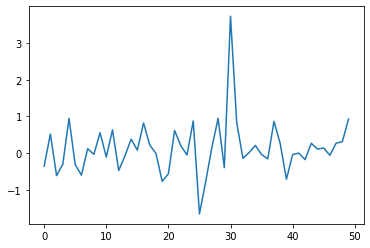

In [13]:
plt.plot(embeddings['good']);

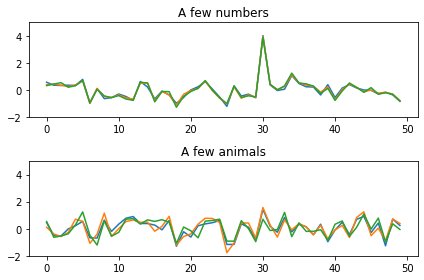

In [14]:
plt.subplot(211)
plt.plot(embeddings['two'])
plt.plot(embeddings['three'])
plt.plot(embeddings['four'])
plt.title("A few numbers")
plt.ylim(-2, 5)

plt.subplot(212)
plt.plot(embeddings['cat'])
plt.plot(embeddings['dog'])
plt.plot(embeddings['rabbit'])
plt.title("A few animals")
plt.ylim(-2, 5)

plt.tight_layout()

In [15]:
vocabulary_size = len(embeddings)
vocabulary_size

400000

## Loading pre-trained embeddings in Keras

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [17]:
embedding_weights = np.zeros((vocabulary_size,
                              embedding_size))

In [18]:
for word, index in word_index.items():
    embedding_weights[index, :] = embeddings[word]

In [19]:
emb_layer = Embedding(input_dim=vocabulary_size,
                      output_dim=embedding_size,
                      mask_zero=False,
                      trainable=False)

In [20]:
word_inverted_index[0]

'the'

In [21]:
model = Sequential()
model.add(emb_layer)

In [22]:
model.set_weights([embedding_weights])

In [23]:
embeddings['cat'] 

array([ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,  0.54602 ,
       -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,  0.33685 ,  0.7735  ,
        0.90094 ,  0.38488 ,  0.38367 ,  0.2657  , -0.08057 ,  0.61089 ,
       -1.2894  , -0.22313 , -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,
        0.60885 , -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
        1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,  0.32481 ,
        0.14485 , -0.44552 ,  0.33497 , -0.95946 , -0.097479,  0.48138 ,
       -0.43352 ,  0.69455 ,  0.91043 , -0.28173 ,  0.41637 , -1.2609  ,
        0.71278 ,  0.23782 ], dtype=float32)

In [24]:
cat_index = word_index['cat']

In [25]:
cat_index

5450

In [26]:
model.predict([[cat_index]])

array([[[ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,
          0.54602 , -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,
          0.33685 ,  0.7735  ,  0.90094 ,  0.38488 ,  0.38367 ,
          0.2657  , -0.08057 ,  0.61089 , -1.2894  , -0.22313 ,
         -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,  0.60885 ,
         -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
          1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,
          0.32481 ,  0.14485 , -0.44552 ,  0.33497 , -0.95946 ,
         -0.097479,  0.48138 , -0.43352 ,  0.69455 ,  0.91043 ,
         -0.28173 ,  0.41637 , -1.2609  ,  0.71278 ,  0.23782 ]]],
      dtype=float32)

## Gensim

In [27]:
import gensim

In [28]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [29]:
glove_path = '../data/embeddings/glove.6B.50d.txt.gz'
glove_w2v_path = '../data/embeddings/glove.6B.50d.txt.vec'

In [30]:
glove2word2vec(glove_path, glove_w2v_path)

(400000, 50)

In [31]:
from gensim.models import KeyedVectors

In [32]:
glove_model = KeyedVectors.load_word2vec_format(
    glove_w2v_path, binary=False)

In [33]:
glove_model.most_similar(positive=['good'], topn=5)

[('better', 0.9284390807151794),
 ('really', 0.9220625162124634),
 ('always', 0.9165270328521729),
 ('sure', 0.9033513069152832),
 ('something', 0.9014205932617188)]

In [34]:
glove_model.most_similar(positive=['two'], topn=5)

[('three', 0.9885902404785156),
 ('four', 0.9817472696304321),
 ('five', 0.9644663333892822),
 ('six', 0.964131236076355),
 ('seven', 0.9512959718704224)]

In [35]:
glove_model.most_similar(positive=['king', 'woman'],
                         negative=['man'], topn=3)

[('queen', 0.8523603677749634),
 ('throne', 0.7664333581924438),
 ('prince', 0.7592144012451172)]

## Visualization

In [36]:
import os

In [37]:
model_dir = '/tmp/tensorboard/'

In [38]:
n_viz = 4000

In [39]:
emb_layer_viz = Embedding(n_viz,
                          embedding_size,
                          mask_zero=False,
                          trainable=False)

In [40]:
model = Sequential([emb_layer_viz])

In [41]:
model.set_weights([embedding_weights[:n_viz]])

In [42]:
word_embeddings = emb_layer_viz.weights[0]

In [43]:
word_embeddings

<tf.Variable 'embedding_1/embeddings:0' shape=(4000, 50) dtype=float32, numpy=
array([[ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.013441,  0.23682 , -0.16899 , ..., -0.56657 ,  0.044691,
         0.30392 ],
       [ 0.15164 ,  0.30177 , -0.16763 , ..., -0.35652 ,  0.016413,
         0.10216 ],
       ...,
       [ 0.32549 , -0.70407 , -0.090213, ..., -0.0817  , -0.19237 ,
         0.44393 ],
       [ 0.26506 ,  0.97649 , -0.32556 , ...,  0.15892 , -0.24229 ,
         0.42123 ],
       [ 0.71854 , -0.53033 , -0.27736 , ...,  1.2854  ,  0.44877 ,
        -0.42896 ]], dtype=float32)>

In [44]:
import tensorflow as tf

In [45]:
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.save(os.path.join(model_dir, 'model.ckpt'))

'/tmp/tensorboard/model.ckpt-1'

In [46]:
os.listdir(model_dir)

['checkpoint', 'model.ckpt-1.index', 'model.ckpt-1.data-00000-of-00001']

In [47]:
fname = os.path.join(model_dir, 'metadata.tsv')

with open(fname, 'w', encoding="utf-8") as fout:
    for index in range(0, n_viz):
        word = word_inverted_index[index]
        fout.write(word + '\n')

In [48]:
config_string = """
embeddings {
  tensor_name: "model/layer_with_weights-0/embeddings/.ATTRIBUTES/VARIABLE_VALUE"
  metadata_path: "metadata.tsv"
}
"""

In [49]:
fname = os.path.join(model_dir, 'projector_config.pbtxt')

with open(fname, 'w', encoding="utf-8") as fout:
    fout.write(config_string)

Now open tensorboard and play with the projector.